# __Figures for manuscript:__

## _"Observing the origins of human brain development: Automated processing for fetal fMRI data"_

In [1]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import nilearn
from nilearn import plotting
from nilearn import datasets
import nibabel as nib
import mni_atlas_reader
import sklearn
from scipy.stats import norm
from scipy.stats.stats import pearsonr
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
sub_dice = pd.read_csv('BySubjectEvaluation.csv')

In [5]:
sub_dice.columns

Index(['Subject', 'Age (days)', 'SD Age (days)', 'Dice', 'Dice SD',
       'Sensitivity', 'Sensitivity SD', 'Specificty', 'Specificty SD',
       'Accuracy', 'Accuracy SD'],
      dtype='object')

In [6]:
pearsonr(sub_dice['Age (days)'], sub_dice['Dice'])

(0.5417732753482045, 4.838933829675793e-05)

In [7]:
pearsonr(sub_dice['Age (days)'], sub_dice['Specificty'])

(0.2786496300122021, 0.050052219484636534)

In [8]:
pearsonr(sub_dice['Age (days)'], sub_dice['Sensitivity'])

(0.22573457691770932, 0.11497200026081966)

In [9]:
pearsonr(sub_dice['Age (days)'], sub_dice['Accuracy'])

(0.2210426588137859, 0.12292155675040105)

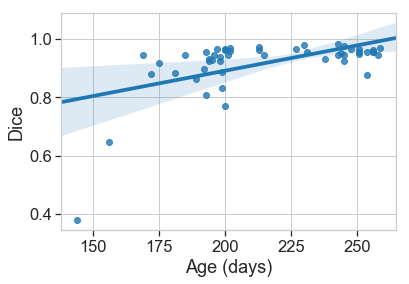

In [10]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=sub_dice["Age (days)"], y=sub_dice["Dice"])
#plt.savefig('BySubject_DicevsAge.png',bbox_inches='tight')

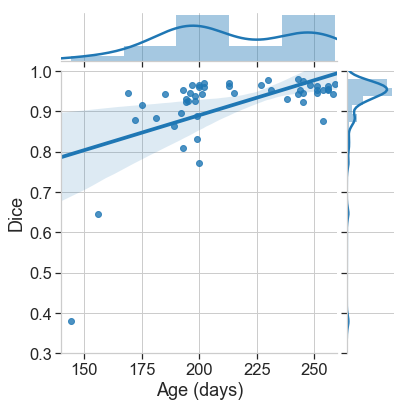

In [11]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
avg_dice_plot = sns.jointplot(x=sub_dice["Age (days)"], y=sub_dice["Dice"], kind="reg",
                  xlim=(140, 260), ylim=(0.3, 1))

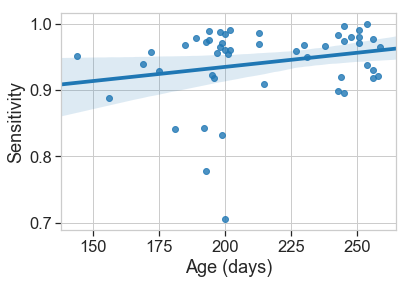

In [12]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=sub_dice["Age (days)"], y=sub_dice["Sensitivity"])
#plt.savefig('BySubject_SensitivityvsAge.png',bbox_inches='tight')

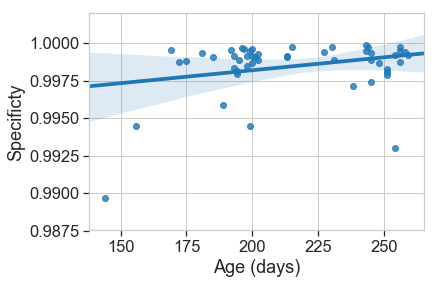

In [13]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=sub_dice["Age (days)"], y=sub_dice["Specificty"])
#plt.savefig('BySubject_SpecificityvsAge.png',bbox_inches='tight')

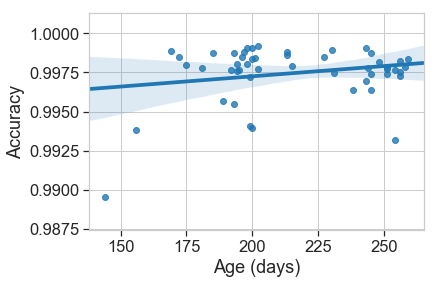

In [14]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=sub_dice["Age (days)"], y=sub_dice["Accuracy"])
#plt.savefig('BySubject_AccuracyvsAge.png',bbox_inches='tight')

In [15]:
vol_dice = pd.read_csv('ByVolumeEvaluation.csv')

In [16]:
vol_dice.columns

Index(['Subject', 'Age', 'Run', 'Volume short', 'Volume long', 'Accuracy',
       'Dice', 'Sensitivity', 'Specificty'],
      dtype='object')

In [17]:
vol_dice.rename(columns={'Age': 'Age (days)'}, inplace=True)

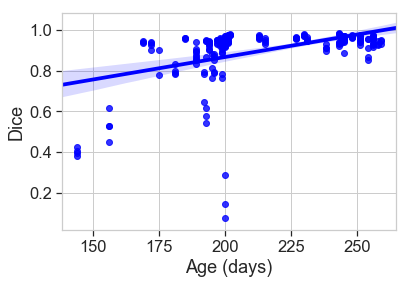

In [18]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=vol_dice["Age (days)"], y=vol_dice["Dice"], color="b")
#plt.savefig('AllVolumes_DicevsAge.png',bbox_inches='tight')

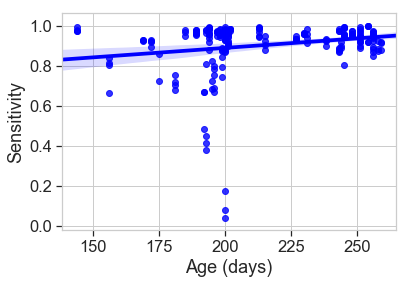

In [19]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=vol_dice["Age (days)"], y=vol_dice["Sensitivity"], color="b")
#plt.savefig('AllVolumes_SensitivityvsAge.png',bbox_inches='tight')

(0.985, 1.001)

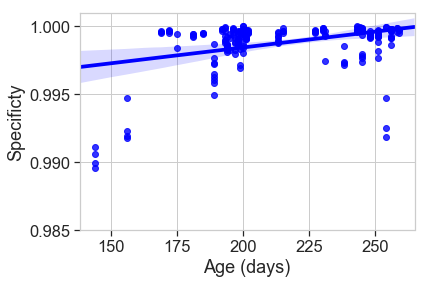

In [20]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=vol_dice["Age (days)"], y=vol_dice["Specificty"], color="b")
plt.ylim(0.985, 1.001)
#plt.savefig('AllVolumes_SpecificityvsAge.png',bbox_inches='tight')

(0.98, 1.0)

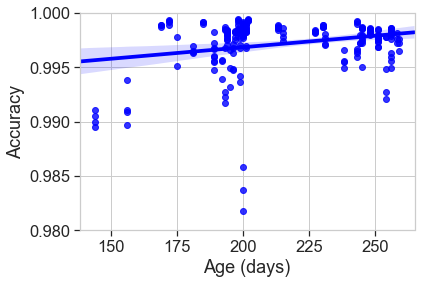

In [21]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=vol_dice["Age (days)"], y=vol_dice["Accuracy"],color="b")
plt.ylim(0.98, 1.00)
#sns.plt.xlim(0, None)
#plt.savefig('AllVolumes_AccuracyvsAge.png',bbox_inches='tight')

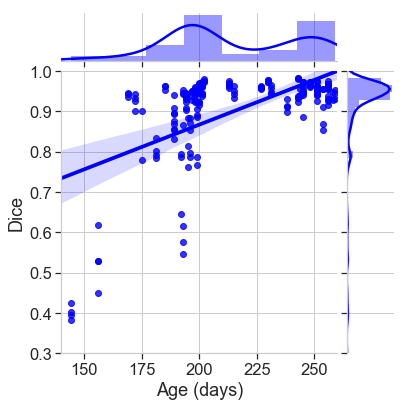

In [22]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
all_dice_plot= sns.jointplot(x=vol_dice["Age (days)"], y=vol_dice["Dice"], kind="reg",
                  xlim=(140, 260), ylim=(0.3, 1), color="b")

[[]]

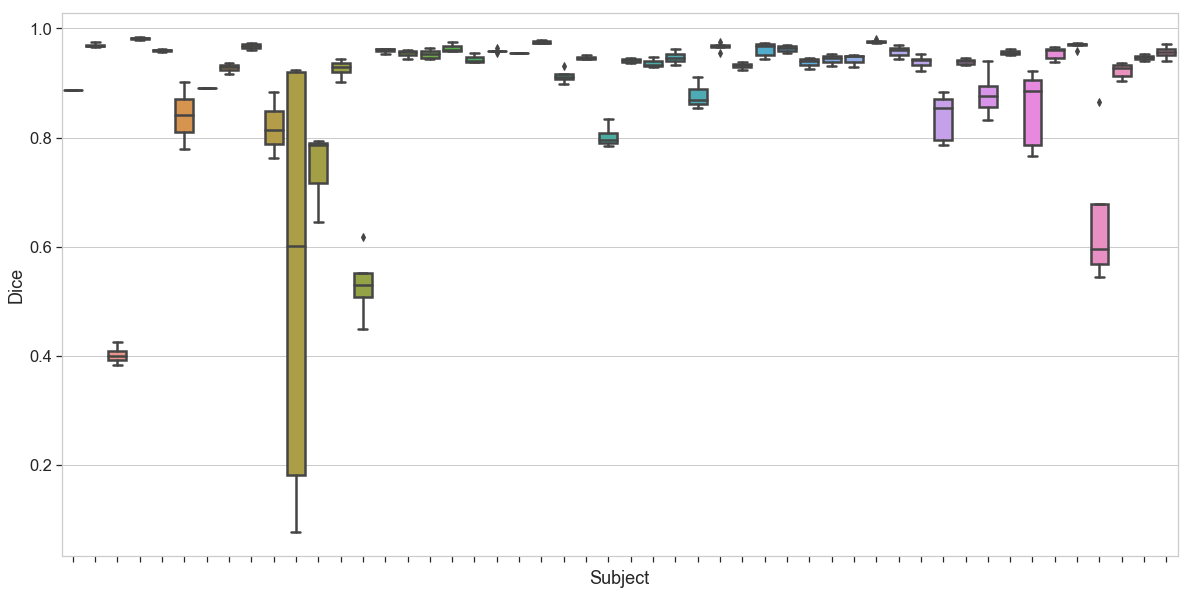

In [23]:
plt.figure(figsize=(20,10)) # this creates a figure 8 inch wide, 4 inch high
g = sns.boxplot(x=vol_dice["Subject"], y=vol_dice["Dice"])
g.set(xticklabels=[])

In [24]:
yale_dice = pd.read_csv('Yale_PatientMetrics3.csv')

In [25]:
#Remove subject that we do not have age information for
yale_dice_age = yale_dice[np.isfinite(yale_dice['Age (days)'])]

In [26]:
pearsonr(yale_dice_age['Age (days)'], yale_dice_age['Dice'])

(-0.09860013489690814, 0.420220795997443)

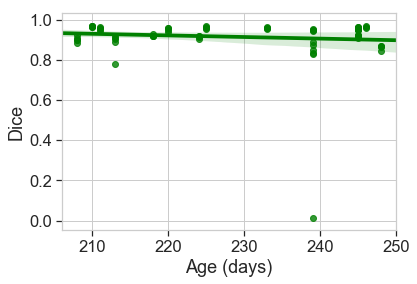

In [27]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=yale_dice_age["Age (days)"], y=yale_dice_age["Dice"], color="g")
#plt.savefig('EBpMdAvsCPZ_black.png',bbox_inches='tight')

[[]]

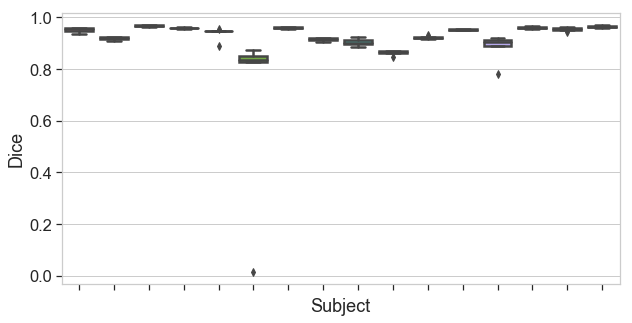

In [28]:
plt.figure(figsize=(10,5)) # this creates a figure 8 inch wide, 4 inch high
g = sns.boxplot(x=yale_dice_age["Subject"], y=yale_dice_age["Dice"])
g.set(xticklabels=[])

In [29]:
motionFD1 = pd.read_csv('../../../Desktop/Work/fetal_motion/merged1.csv')
motionFD09 = pd.read_csv('../../../Desktop/Work/fetal_motion/merged09.csv')
motionFD08 = pd.read_csv('../../../Desktop/Work/fetal_motion/merged08.csv')
motionFD07 = pd.read_csv('../../../Desktop/Work/fetal_motion/merged07.csv')
motionFD06 = pd.read_csv('../../../Desktop/Work/fetal_motion/merged06.csv')
motionFD05 = pd.read_csv('../../../Desktop/Work/fetal_motion/merged05.csv')

In [30]:
motionFD1['VolumesPostCensor'].mean()

59.53719008264463

In [31]:
motionFD09['VolumesPostCensor'].mean()

49.96143250688705

In [32]:
motionFD08['VolumesPostCensor'].mean()

40.672176308539946

In [33]:
motionFD07['VolumesPostCensor'].mean()

31.47382920110193

In [34]:
motionFD06['VolumesPostCensor'].mean()

23.12121212121212

In [35]:
motionFD05['VolumesPostCensor'].mean()

15.950413223140496

In [36]:
motionFD1['Frame Count'].iloc[0:192].mean()
#motionFD1[['Frame Count'].iloc[[0:]].mean()

160.359375

In [37]:
motionFD1['Old-New'] = motionFD1['Frame Count'] - motionFD1['VolumesPostCensor']
motionFD09['Old-New'] = motionFD09['Frame Count'] - motionFD09['VolumesPostCensor']
motionFD08['Old-New'] = motionFD08['Frame Count'] - motionFD08['VolumesPostCensor']
motionFD07['Old-New'] = motionFD07['Frame Count'] - motionFD07['VolumesPostCensor']
motionFD06['Old-New'] = motionFD06['Frame Count'] - motionFD06['VolumesPostCensor']
motionFD05['Old-New'] = motionFD05['Frame Count'] - motionFD05['VolumesPostCensor']

In [38]:
len(motionFD1)

363

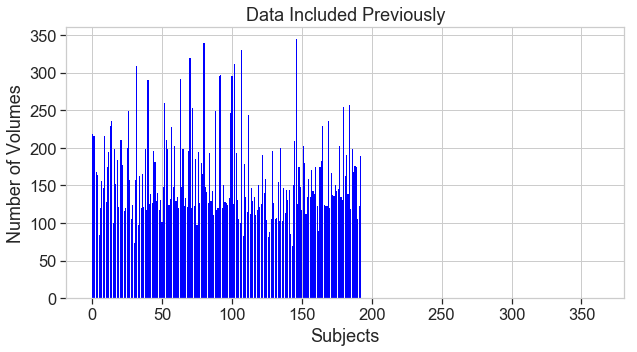

In [39]:
plt.figure(figsize=(10,5))
A = motionFD1['Frame Count']
B = motionFD1['VolumesPostCensor']
X = range(363)

plt.bar(X, A, color = 'b')
#plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Included Previously')
plt.show()

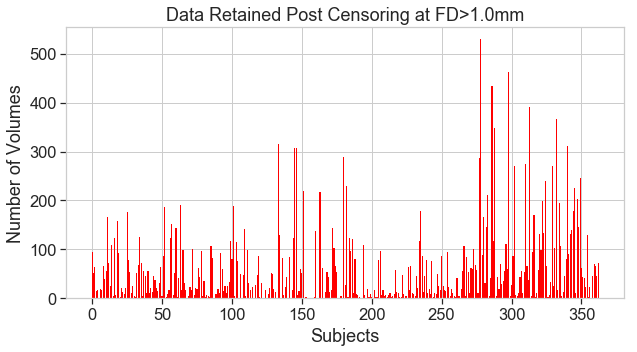

In [40]:
plt.figure(figsize=(10,5))
A = motionFD1['Frame Count']
B = motionFD1['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>1.0mm')
plt.show()

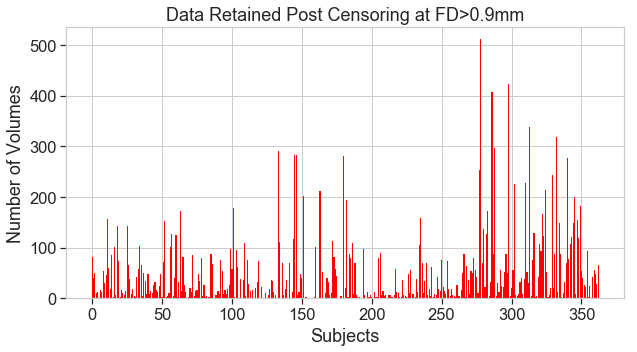

In [41]:
plt.figure(figsize=(10,5))
A = motionFD09['Frame Count']
B = motionFD09['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.9mm')
plt.show()

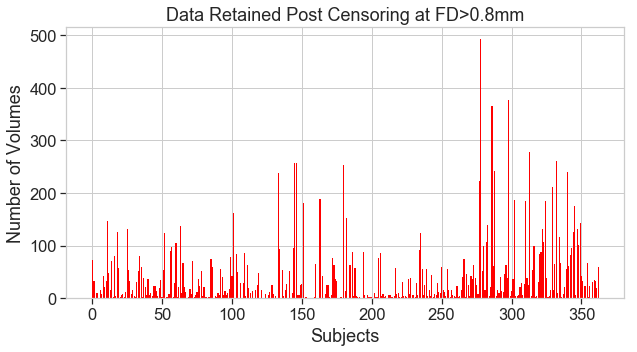

In [42]:
plt.figure(figsize=(10,5))
A = motionFD08['Frame Count']
B = motionFD08['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.8mm')
plt.show()

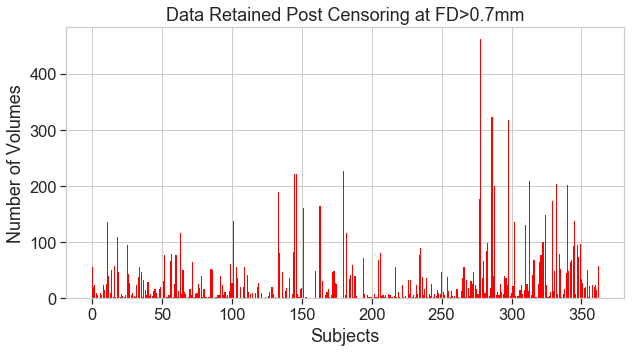

In [43]:
plt.figure(figsize=(10,5))
A = motionFD07['Frame Count']
B = motionFD07['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.7mm')
plt.show()

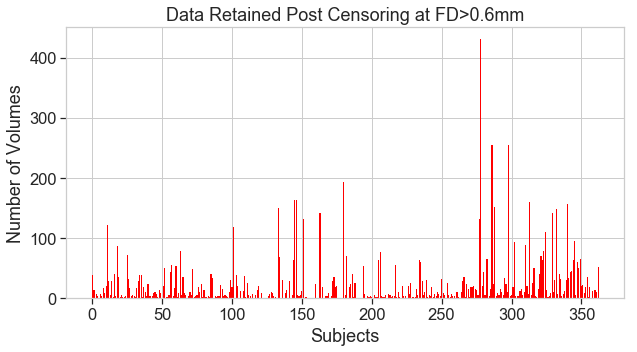

In [44]:
plt.figure(figsize=(10,5))
A = motionFD06['Frame Count']
B = motionFD06['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.6mm')
plt.show()

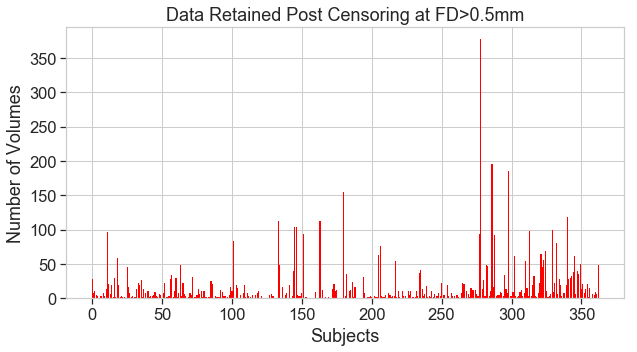

In [45]:
plt.figure(figsize=(10,5))
A = motionFD05['Frame Count']
B = motionFD05['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.5mm')
plt.show()